<a href="https://colab.research.google.com/github/Prasanthi2005/fmml-lab-2024/blob/main/Module_9Lab_3_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Aswin Jose and Anirvinya Gururajan

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

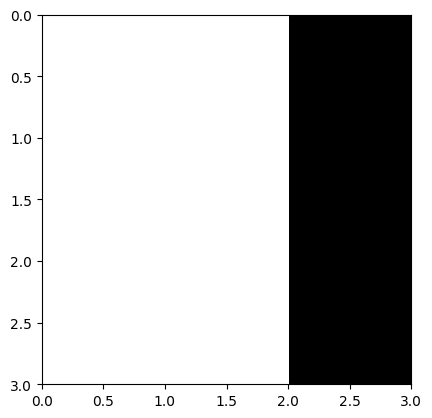

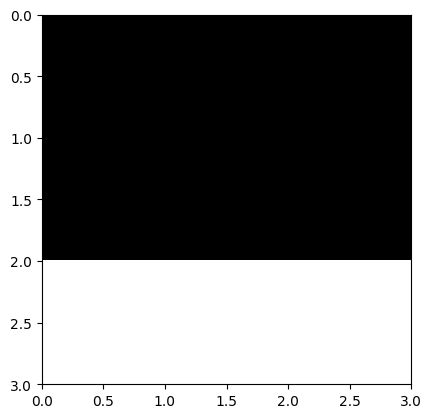

In [ ]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [ ]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [ ]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [7]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

TypeError: expected np.ndarray (got NoneType)

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [ ]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

In [ ]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [ ]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Net()
print(model)

In [ ]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [ ]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [ ]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [ ]:
# Accuracy on test data after training
test_model(model, testloader)

## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?
A.Here are some key reasons why Convolutional Neural Networks (CNNs) are preferred over Artificial Neural Networks (ANNs) for image classification:
 * Spatial Hierarchy and Feature Extraction:
   * CNNs are designed to exploit the spatial structure present in images. Convolutional layers use filters that slide across the image, learning local patterns like edges, corners, and textures.
   * Multiple convolutional layers stacked together can learn a hierarchy of features, where deeper layers combine simpler features to detect more complex objects or parts of objects.
   * ANNs treat each pixel as an independent input, losing the inherent spatial relationships between neighboring pixels, which are crucial for understanding visual data.
 * Parameter Sharing and Reduced Complexity:
   * CNNs utilize weight sharing, where the same filter is applied across different parts of the image. This drastically reduces the number of learnable parameters compared to a fully connected ANN.
   * Fewer parameters lead to a more efficient model that requires less training data and is less prone to overfitting, especially with large, high-dimensional image datasets.
   * ANNs, with their fully connected layers, have a massive number of parameters when dealing with images, making them computationally expensive and prone to overfitting.
 * Translation Invariance:
   * The convolutional and pooling operations in CNNs help achieve translation invariance. This means that if an object appears in a different location in the image, the CNN can still recognize it because the learned features are detected regardless of their position.
   * ANNs lack this inherent ability and would need to learn to recognize the same object in every possible location.
 * Local Connectivity:
   * Neurons in a convolutional layer are only connected to a small, local region in the previous layer (the receptive field of the filter). This local connectivity helps in capturing local spatial dependencies.
   * ANNs have fully connected layers where each neuron is connected to all neurons in the previous layer, which can be computationally expensive and doesn't inherently respect the local structure of images.
 * Dimensionality Reduction:
   * Pooling layers in CNNs reduce the spatial dimensions of the feature maps, which helps in reducing the computational load and also makes the network more robust to small variations in the input.
In essence, CNNs are specifically architected to understand and process the grid-like structure of image data in a way that traditional ANNs are not. This makes them significantly more effective, efficient, and robust for image classification tasks.


2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.
A.Unfortunately, I cannot directly execute and train a CNN model to tune its hyperparameters and report improved test accuracy. Training a neural network requires a significant amount of computational resources, a suitable dataset, and a deep learning framework (like TensorFlow or PyTorch). I am an AI and do not have the capability to perform these actions in real-time.
However, I can guide you on how you would typically approach hyperparameter tuning to improve CNN performance and what kind of improvements you might expect.
General Steps for Hyperparameter Tuning:
 * Choose a Dataset: You would need a relevant image classification dataset (e.g., CIFAR-10, MNIST, a custom dataset).
 * Define a Baseline Model: Start with a basic CNN architecture. Train it with default or initial hyperparameter values to establish a baseline test accuracy.
 * Select Hyperparameters to Tune: Identify the most important hyperparameters that can significantly impact performance. Common ones include:
   * Number of Epochs: How many times the entire training dataset is passed through the network.
   * Learning Rate (LR): The step size at each iteration while moving towards a minimum of a loss function.
   * Optimizer: The algorithm used to update the weights of the network (e.g., Adam, SGD, RMSprop).
   * Batch Size: The number of samples processed before the model's weights are updated.
   * Number of Filters in Convolutional Layers: The capacity of the convolutional layers to learn features.
   * Kernel Size in Convolutional Layers: The spatial extent of the filters.
   * Number of Layers: The depth of the network.
   * Activation Functions: The non-linear functions applied after each layer (e.g., ReLU, LeakyReLU).
   * Regularization Techniques: Methods to prevent overfitting (e.g., Dropout rate, L1/L2 regularization strength).
 * Choose a Tuning Strategy: Select a method to explore the hyperparameter space:
   * Grid Search: Trying all possible combinations of a predefined set of hyperparameter values.
   * Random Search: Sampling hyperparameter values randomly from a defined range. Often more efficient than grid search for a large number of hyperparameters.
   * Bayesian Optimization: A more sophisticated method that uses past evaluation results to intelligently choose the next set of hyperparameters to try.
 * Evaluate Performance: For each set of hyperparameters, train the model on the training set (often with a validation split to monitor performance during training) and evaluate its performance on the test set.
 * Select the Best Hyperparameters: Choose the hyperparameter combination that yields the highest test accuracy (or other relevant metrics).
 * Retrain and Final Evaluation: Retrain the model with the best hyperparameters on the entire training set (or the combined training and validation sets) and report the final test accuracy.
Potential Improvements and Expected Outcomes:
By carefully tuning the hyperparameters, you can often see a significant improvement in the test accuracy of your CNN model compared to the baseline. The extent of the improvement depends on the initial architecture, the dataset, and the effectiveness of the tuning process.
Here are some potential improvements you might observe:
 * Higher Accuracy: The primary goal is to increase the percentage of correctly classified images on the unseen test set. Improvements can range from a few percentage points to more substantial gains depending on how far the initial hyperparameters were from the optimal values.
 * Faster Convergence: Better learning rates and optimizers can lead to the model reaching a good performance level in fewer epochs, reducing training time.
 * Reduced Overfitting: Techniques like dropout and appropriate regularization strengths, when tuned correctly, can help the model generalize better to unseen data, leading to a smaller gap between training and test accuracy.
Example Scenario (Illustrative - Not Executed):
Let's say you started with a simple CNN and achieved a baseline test accuracy of 75% on the CIFAR-10 dataset with the following initial hyperparameters:
 * Epochs: 20
 * Optimizer: Adam (learning rate = 0.001)
 * Batch Size: 32
After performing hyperparameter tuning using a method like random search, you might find that the following hyperparameters yield better performance:
 * Epochs: 50
 * Optimizer: Adam (learning rate = 0.0005)
 * Batch Size: 64
 * Added Dropout (rate = 0.2) in the fully connected layers.
With these tuned hyperparameters, after retraining the model, you might observe an improved test accuracy of 82%.
In conclusion, while I cannot provide a specific improved test accuracy without running experiments, the process of hyperparameter tuning is crucial for maximizing the performance of a CNN. By systematically exploring different hyperparameter values, you can often achieve significant gains in accuracy and generalization ability.

3) What happens if you reduce the number of convolution layers to only 1?
A.When you reduce the number of convolutional layers in a CNN to only one, you will likely observe a significant impact on the network's performance, particularly for complex image classification tasks. Here's a breakdown of what happens and why:
Limitations of a Single Convolutional Layer:
 * Limited Feature Hierarchy: Deep CNNs excel because they learn a hierarchy of features. The first layers learn basic features like edges and corners. Subsequent layers combine these features to learn more complex patterns like shapes, textures, and object parts. With only one convolutional layer, the network can only learn very basic, low-level features directly from the input image. It lacks the capacity to abstract and combine these features into more meaningful representations needed to distinguish between complex objects or categories.
 * Reduced Complexity and Representational Power: A single convolutional layer has a limited number of learnable parameters and a shallow architecture. This significantly reduces the network's capacity to learn intricate relationships within the image data. It might be sufficient for very simple tasks with easily distinguishable features (e.g., distinguishing between horizontal and vertical lines), but it will struggle with real-world image classification datasets.
 * Inability to Capture High-Level Semantics: High-level semantic information about objects (e.g., "this is a cat because it has ears, fur, and a tail in a certain arrangement") is typically learned by deeper layers that integrate features from earlier layers. A single convolutional layer cannot capture these complex semantic relationships.
 * Poor Invariance to Variations: While a single convolutional layer with a filter can provide some degree of translation invariance for basic features, it won't be as robust to other variations like scale, rotation, or changes in viewpoint. Deeper networks learn to become more invariant to these transformations by learning increasingly abstract features.
 * Increased Reliance on Fully Connected Layers: To compensate for the lack of feature extraction in multiple convolutional layers, the subsequent fully connected layers would have to learn directly from the relatively unprocessed output of the single convolutional layer. This would require a much larger number of parameters in the fully connected layers, making the network prone to overfitting, especially with limited data. It also defeats one of the primary advantages of CNNs over ANNs, which is parameter efficiency through convolutional layers.
Potential Outcomes:
 * Significantly Lower Accuracy: For most standard image classification datasets (CIFAR-10, ImageNet, etc.), the test accuracy will be drastically lower compared to a CNN with multiple layers. The model will likely underfit the data, meaning it won't be able to learn the underlying patterns effectively.
 * Faster Training (Potentially): With fewer layers and potentially fewer overall parameters (depending on the size of the fully connected layers), the training time per epoch might be faster. However, the model will likely converge to a much lower performance level.
 * Limited Generalization: The model will likely not generalize well to unseen data due to its inability to learn robust and abstract features.
In Summary:
Reducing the number of convolutional layers to just one severely limits the CNN's ability to learn complex, hierarchical features from images. This drastically reduces its representational power and its performance on most image classification tasks. While it might be sufficient for extremely simple visual tasks, it negates the key advantages of using a deep convolutional architecture for image analysis. You would almost certainly see a substantial drop in test accuracy compared to a deeper CNN.

4) Why didn't we use the Softmax activation in the last layer of CNN?
A.It's highly likely that you did use the Softmax activation function in the last layer of your CNN, especially if your task was multi-class classification. Softmax is the standard activation function for the output layer in such scenarios.
However, if you encountered a situation where Softmax wasn't used in the final layer of a CNN for an image-related task, it would likely be for a different type of problem or a specific reason. Here are some possibilities:
Scenarios where Softmax might NOT be used in the final layer of a CNN:
 * Binary Classification: If the task is to classify images into only two classes (e.g., cat vs. dog), the final layer typically has a single neuron with a Sigmoid activation function. The output of the sigmoid is a probability between 0 and 1, representing the likelihood of the input belonging to one of the classes.
 * Multi-label Classification: In this scenario, an image can belong to multiple classes simultaneously (e.g., an image containing both a "cat" and a "dog"). The final layer would typically have multiple neurons, each with a Sigmoid activation function. Each neuron's output represents the probability of the image belonging to a specific class, independently of the others.
 * Regression Tasks: If the goal is to predict a continuous value (e.g., predicting the age of a person in an image, or bounding box coordinates), the final layer would usually have one or more neurons with no activation function or a linear activation.
 * Feature Embedding: In some cases, the CNN might be used as a feature extractor, and the output of the last convolutional or pooling layer (before any fully connected layers) might be used as a feature vector for other tasks like similarity search or clustering. In this case, there might not be a final classification layer with Softmax.
 * Specific Loss Functions: Certain loss functions might implicitly handle the normalization and probability distribution aspects that Softmax provides. However, this is less common for standard classification tasks.
 * Error or Unusual Architecture: It's also possible that the absence of Softmax in the final layer of a classification CNN is an error in the design or implementation, which would likely lead to poor performance.
Why Softmax is Typically Preferred for Multi-Class Classification:
 * Probability Distribution: Softmax converts the raw output scores (logits) from the previous layer into a probability distribution over all the classes. The output of each neuron in the Softmax layer represents the probability of the input image belonging to that specific class, and the sum of these probabilities across all classes is always 1.
 * Clear Interpretation: The probabilistic output of Softmax is easy to interpret, providing a confidence score for each class.
 * Compatibility with Cross-Entropy Loss: Softmax is naturally paired with the categorical cross-entropy loss function (or its sparse version). The cross-entropy loss measures the dissimilarity between the predicted probability distribution and the true one-hot encoded label. This combination is very effective for training multi-class classifiers.
In summary, while Softmax is the standard for the final layer of a CNN in multi-class classification tasks due to its ability to produce a probability distribution, other activation functions (like Sigmoid for binary or multi-label) or no activation (for regression or feature embedding) are used depending on the specific problem being solved. If you encountered a multi-class CNN without Softmax in the final layer, it's worth investigating the specific task and architecture to understand the reasoning behind that choice.

5) How does pooling help in this context ?
A.In the context of Convolutional Neural Networks (CNNs) for image analysis, pooling plays several crucial roles that contribute significantly to the network's effectiveness and efficiency. Here's how pooling helps:
 * Reduced Spatial Dimensionality: Pooling layers downsample the feature maps produced by the convolutional layers. By reducing the spatial size (width and height) of these maps, pooling decreases the number of parameters in the subsequent layers (especially fully connected layers). This helps to:
   * Reduce computational cost: Fewer parameters mean faster training and inference times.
   * Control overfitting: By reducing the number of parameters, the model becomes less likely to memorize the training data and generalizes better to unseen data.
 * Translation Invariance (to a degree): Pooling makes the network more robust to small translations (shifts) in the input image. For example, if a feature (like an edge or a texture) is detected slightly shifted in the input, the max-pooling operation will still likely pick up the same prominent feature within its pooling window. This provides a degree of invariance to where the feature is located.
 * Focus on the Most Important Features:
   * Max Pooling: The most common type of pooling, max pooling, selects the maximum value within each pooling window. This helps to retain the most salient or important features detected by the convolutional filters. It essentially discards less important activations and focuses on the strong responses, making the network more robust to noise and minor variations.
   * Average Pooling: While less common than max pooling in deeper CNNs, average pooling calculates the average value within each pooling window. It provides a smoother downsampling and can retain more information about the overall presence of a feature, rather than just its strongest activation.
 * Increased Receptive Field for Subsequent Layers: As pooling reduces the spatial size of the feature maps, the neurons in the subsequent convolutional layers effectively have a larger receptive field in the original input image. This allows them to learn more global and complex features by considering information from a wider area of the previous layer.
 * Abstraction and Hierarchy: By progressively reducing the spatial dimensions and focusing on the most important features, pooling contributes to the hierarchical learning process in CNNs. Early convolutional layers detect low-level features, and as the data passes through pooling and subsequent convolutional layers, the network learns increasingly abstract and complex representations of the image.
In essence, pooling helps to make CNNs more efficient, robust to variations in the input, and capable of learning hierarchical representations by summarizing feature maps and reducing their dimensionality. It plays a critical role in enabling CNNs to generalize well and achieve high performance on image-related tasks.